In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from helpers.load_data import load_leads_with_deals


df_leads_deals = load_leads_with_deals()
df_leads_deals["time_to_convert"] = df_leads_deals["won_date"] - df_leads_deals["first_contact_date"]

df_leads_deals["first_contact_year"] = df_leads_deals["first_contact_date"].dt.year
df_leads_deals["first_contact_month"] = df_leads_deals["first_contact_date"].dt.month
df_leads_deals["first_contact_day"] = df_leads_deals["first_contact_date"].dt.day
df_leads_deals["first_contact_weekday"] = df_leads_deals["first_contact_date"].dt.day_name()

df_leads_deals["origin"] = df_leads_deals["origin"].fillna("unknown")

In [2]:
# Display basic info
print(f"Total leads: {len(df_leads_deals):,}")
print(f"Date range: {df_leads_deals['first_contact_date'].min()} to {df_leads_deals['first_contact_date'].max()}")
print(f"\nConversion rate: {df_leads_deals['conversed_lead'].mean()*100:.2f}%")
print(f"Total conversions: {df_leads_deals['conversed_lead'].sum():,}")

df_leads_deals.head()

Total leads: 8,000
Date range: 2017-06-14 00:00:00 to 2018-05-31 00:00:00

Conversion rate: 10.53%
Total conversions: 842


,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,conversed_lead,time_to_convert,first_contact_year,first_contact_month,first_contact_day,first_contact_weekday
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaT,2018,2,1,Thursday
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaT,2017,10,20,Friday
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaT,2018,3,22,Thursday
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaT,2018,1,22,Monday
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,True,5 days 19:58:54,2018,2,21,Wednesday


In [3]:
# Create cohort column (Year-Month)
df_leads_deals['cohort'] = df_leads_deals['first_contact_date'].dt.to_period('M')

# For converted leads, calculate months since first contact
df_leads_deals['time_to_convert_days'] = df_leads_deals['time_to_convert'].dt.days

print("\nCohort analysis setup complete")
print(f"Number of cohorts: {df_leads_deals['cohort'].nunique()}")
print(f"Average time to convert: {df_leads_deals[df_leads_deals['conversed_lead']]['time_to_convert_days'].mean():.1f} days")


Cohort analysis setup complete
Number of cohorts: 12
Average time to convert: 48.4 days


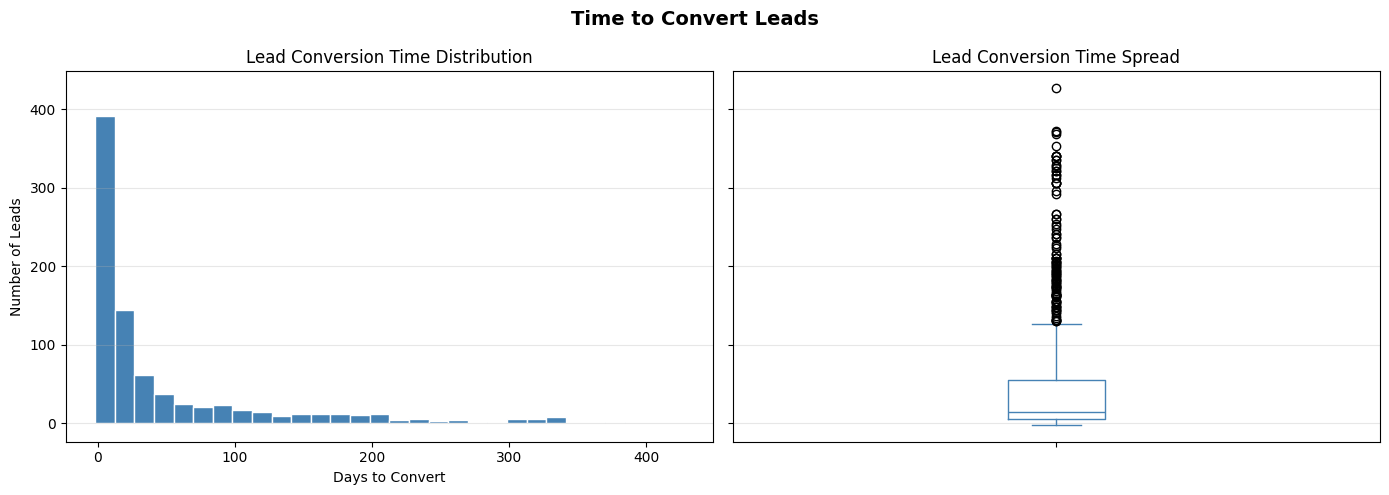

In [4]:
time_to_convert = df_leads_deals['time_to_convert'].dropna().dt.days

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Histogram
time_to_convert.plot(kind='hist', bins=30, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Lead Conversion Time Distribution')
axes[0].set_xlabel('Days to Convert')
axes[0].set_ylabel('Number of Leads')
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
time_to_convert.plot(kind='box', ax=axes[1], color='steelblue')
axes[1].set_title('Lead Conversion Time Spread')
axes[1].set_ylabel('Days to Convert')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels([''])

fig.suptitle('Time to Convert Leads', fontsize=14, fontweight='bold')
plt.tight_layout()

## 1. Monthly Cohort Analysis

Analysis of leads grouped by their first contact month, tracking conversion rates and performance over time.

In [5]:
# Monthly cohort summary
cohort_summary = df_leads_deals.groupby('cohort').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean'],
    'time_to_convert_days': 'mean'
}).round(2)

cohort_summary.columns = ['total_leads', 'conversions', 'conversion_rate', 'avg_days_to_convert']
cohort_summary['conversion_rate_pct'] = cohort_summary['conversion_rate'] * 100

print("=== Monthly Cohort Summary ===")
display(cohort_summary)

=== Monthly Cohort Summary ===


,total_leads,conversions,conversion_rate,avg_days_to_convert,conversion_rate_pct
cohort,,,,,
2017-06,4,0,0.0,NaN,0.0
2017-07,239,2,0.01,398.00,1.0
2017-08,386,9,0.02,296.00,2.0
2017-09,312,7,0.02,283.71,2.0
2017-10,416,14,0.03,240.21,3.0
2017-11,445,18,0.04,155.11,4.0
2017-12,200,11,0.06,122.36,6.0
2018-01,1141,152,0.13,43.65,13.0
2018-02,1028,149,0.14,42.28,14.0


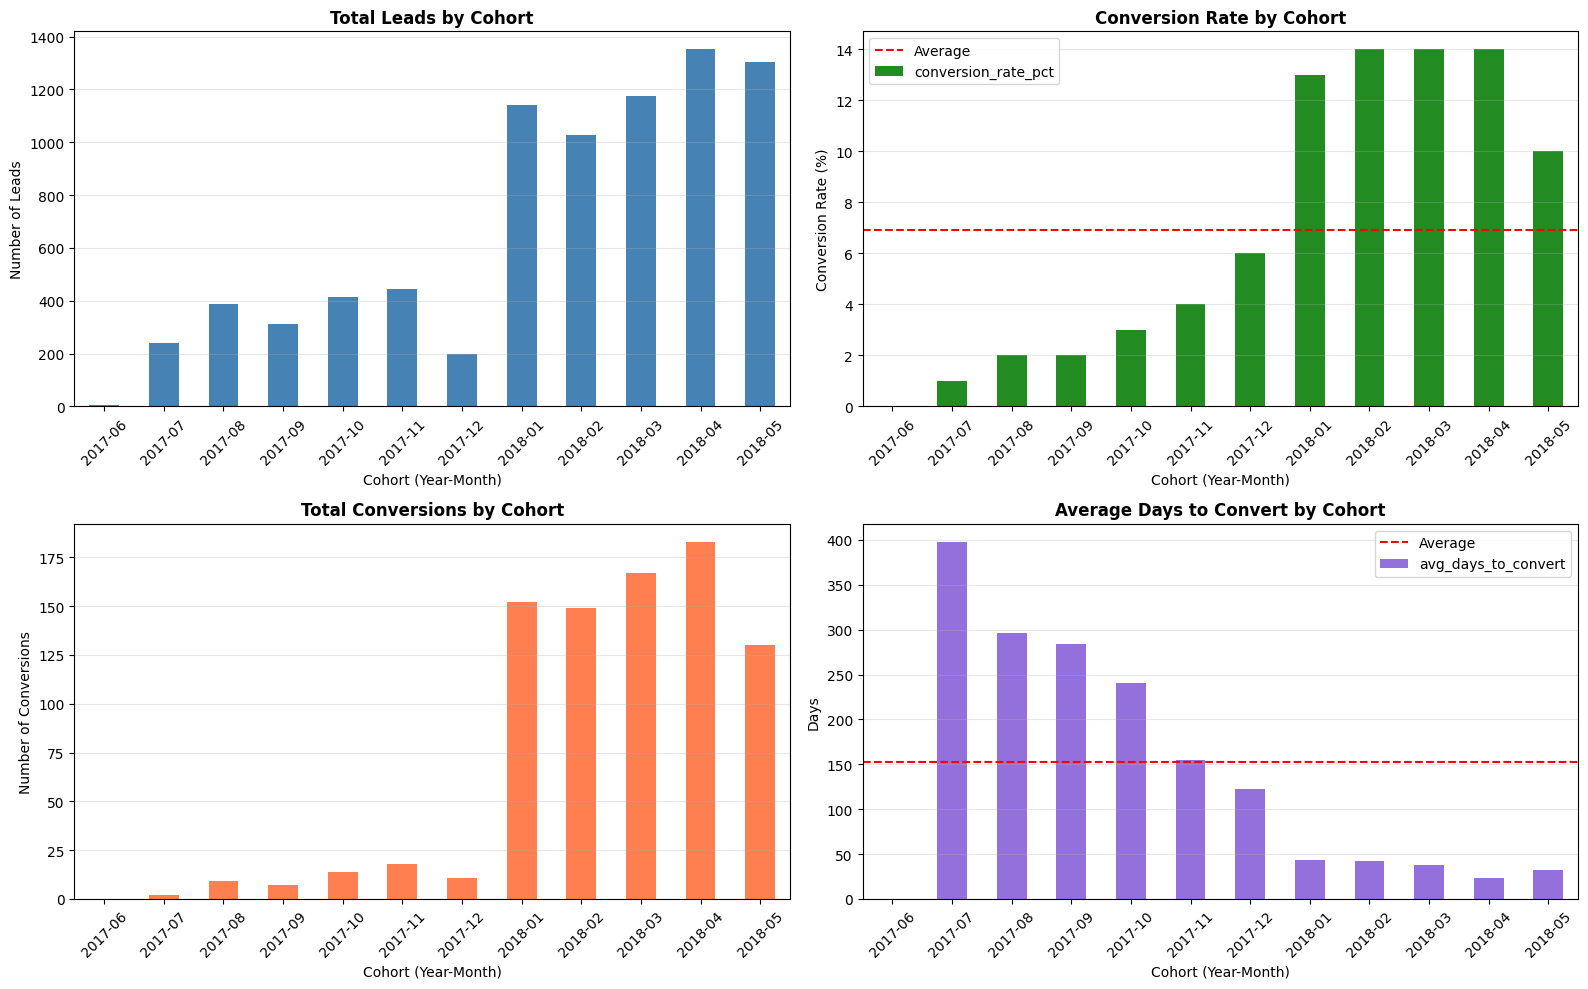

In [6]:
# Visualize cohort metrics
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Total leads per cohort
cohort_summary['total_leads'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Total Leads by Cohort', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cohort (Year-Month)')
axes[0].set_ylabel('Number of Leads')
axes[0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Conversion rate per cohort
cohort_summary['conversion_rate_pct'].plot(kind='bar', ax=axes[0, 1], color='forestgreen')
axes[0, 1].set_title('Conversion Rate by Cohort', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cohort (Year-Month)')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=cohort_summary['conversion_rate_pct'].mean(), color='red', linestyle='--', label='Average')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Total conversions per cohort
cohort_summary['conversions'].plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Total Conversions by Cohort', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Cohort (Year-Month)')
axes[1, 0].set_ylabel('Number of Conversions')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Average days to convert
cohort_summary['avg_days_to_convert'].plot(kind='bar', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Average Days to Convert by Cohort', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Cohort (Year-Month)')
axes[1, 1].set_ylabel('Days')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=cohort_summary['avg_days_to_convert'].mean(), color='red', linestyle='--', label='Average')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Cohort Retention/Conversion Matrix

In [7]:
# Prepare data for cohort matrix - only converted leads
df_converted = df_leads_deals[df_leads_deals['conversed_lead'] == True].copy()

# Calculate months to convert
df_converted['won_month'] = df_converted['won_date'].dt.to_period('M')
df_converted['months_to_convert'] = (
    (df_converted['won_date'].dt.year - df_converted['first_contact_date'].dt.year) * 12 +
    (df_converted['won_date'].dt.month - df_converted['first_contact_date'].dt.month)
)

# Create cohort counts matrix
cohort_counts = df_converted.groupby(['cohort', 'months_to_convert']).size().unstack(fill_value=0)

# Get cohort sizes
cohort_sizes = df_leads_deals.groupby('cohort').size()

# Calculate conversion rate matrix
cohort_conversion_matrix = cohort_counts.divide(cohort_sizes, axis=0) * 100

# Calculate cumulative conversion
cohort_conversion_cumulative = cohort_conversion_matrix.cumsum(axis=1)

print("=== Cohort Conversion Matrix (Cumulative %) ===")
print("Shows the percentage of leads that converted within N months of first contact")
display(cohort_conversion_cumulative.round(2))

=== Cohort Conversion Matrix (Cumulative %) ===
Shows the percentage of leads that converted within N months of first contact


months_to_convert,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.42,0.84
2017-08,0.00,0.00,0.00,0.00,0.00,0.26,0.26,0.26,0.52,0.52,1.55,1.81,2.33,2.33,2.33
2017-09,0.00,0.00,0.00,0.00,0.32,0.32,0.32,0.64,0.96,0.96,0.96,1.92,1.92,2.24,2.24
2017-10,0.00,0.00,0.00,0.00,0.24,0.48,1.44,1.68,1.68,2.16,2.88,3.12,3.37,3.37,3.37
2017-11,0.00,0.45,1.35,1.80,1.80,2.70,2.92,2.92,3.15,3.37,3.37,4.04,4.04,4.04,4.04
2017-12,0.50,2.00,3.00,3.00,3.00,4.00,4.00,4.50,4.50,4.50,5.00,5.50,5.50,5.50,5.50
2018-01,5.61,9.38,10.78,11.66,12.01,12.53,12.80,13.06,13.15,13.23,13.32,13.32,13.32,13.32,13.32
2018-02,6.32,10.99,12.06,12.74,13.04,13.52,13.62,14.01,14.40,14.49,14.49,14.49,14.49,14.49,14.49


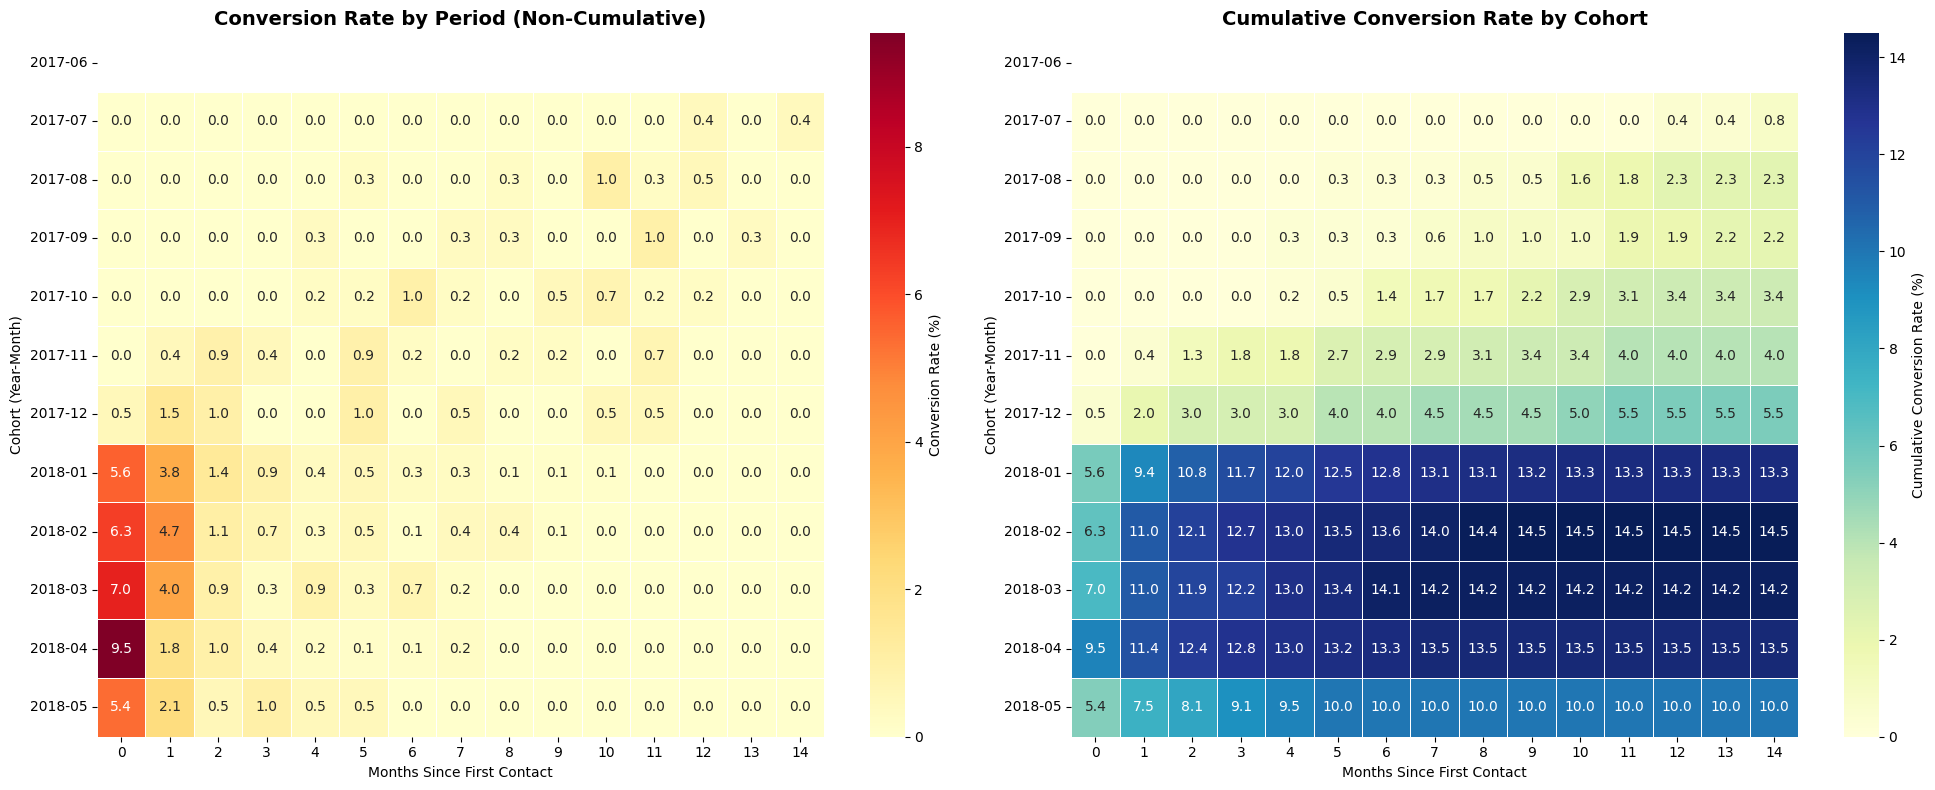

In [8]:
# Visualize cohort matrix with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: Non-cumulative conversion rates
sns.heatmap(
    cohort_conversion_matrix,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    ax=axes[0],
    cbar_kws={'label': 'Conversion Rate (%)'},
    linewidths=0.5
)
axes[0].set_title('Conversion Rate by Period (Non-Cumulative)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Months Since First Contact')
axes[0].set_ylabel('Cohort (Year-Month)')

# Heatmap 2: Cumulative conversion rates
sns.heatmap(
    cohort_conversion_cumulative,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    ax=axes[1],
    cbar_kws={'label': 'Cumulative Conversion Rate (%)'},
    linewidths=0.5
)
axes[1].set_title('Cumulative Conversion Rate by Cohort', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Months Since First Contact')
axes[1].set_ylabel('Cohort (Year-Month)')

plt.tight_layout()
plt.show()

## 3. Cohort Analysis by Lead Origin

Analyzing conversion patterns across different lead acquisition channels.

In [9]:
# Analysis by origin
origin_analysis = df_leads_deals.groupby('origin').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean'],
    'time_to_convert_days': 'mean'
}).round(2)

origin_analysis.columns = ['total_leads', 'conversions', 'conversion_rate', 'avg_days_to_convert']
origin_analysis['conversion_rate_pct'] = origin_analysis['conversion_rate'] * 100
origin_analysis = origin_analysis.sort_values('total_leads', ascending=False)

print("=== Analysis by Lead Origin ===")
display(origin_analysis)

=== Analysis by Lead Origin ===


,total_leads,conversions,conversion_rate,avg_days_to_convert,conversion_rate_pct
origin,,,,,
organic_search,2296,271,0.12,50.00,12.0
paid_search,1586,195,0.12,56.60,12.0
social,1350,75,0.06,60.96,6.0
unknown,1099,179,0.16,41.29,16.0
direct_traffic,499,56,0.11,31.12,11.0
email,493,15,0.03,52.20,3.0
referral,284,24,0.08,32.54,8.0
other,150,4,0.03,15.25,3.0
display,118,6,0.05,10.33,5.0


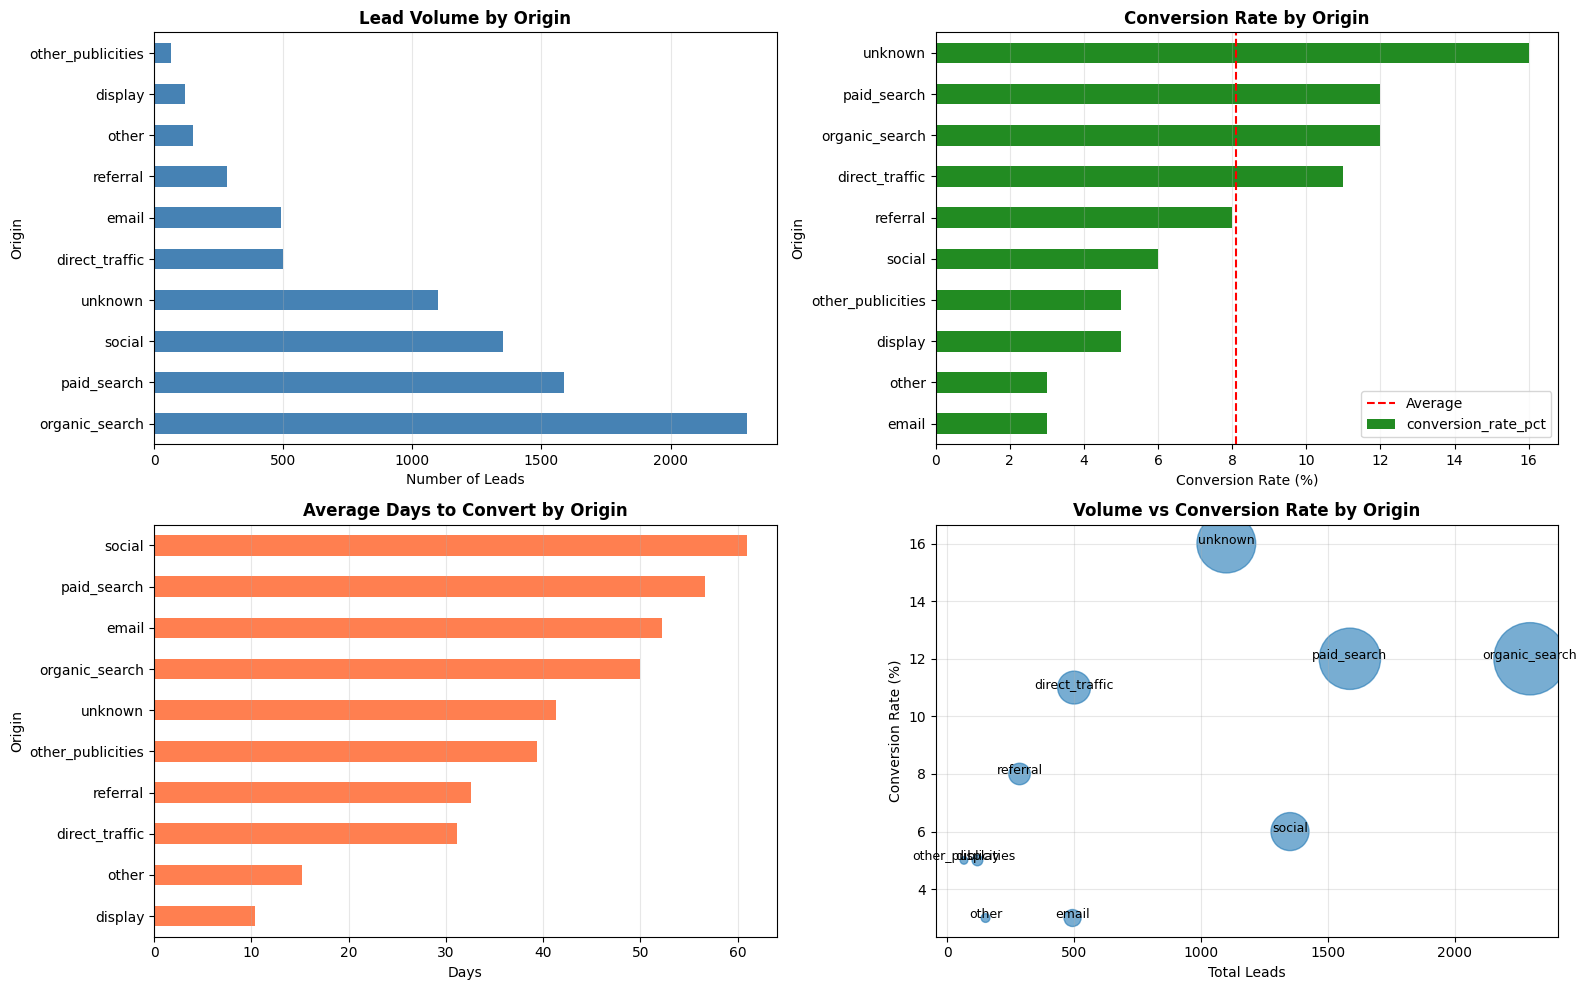

In [10]:
# Visualize origin analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Volume by origin
origin_analysis['total_leads'].plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Lead Volume by Origin', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Leads')
axes[0, 0].set_ylabel('Origin')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Conversion rate by origin
origin_analysis['conversion_rate_pct'].sort_values().plot(kind='barh', ax=axes[0, 1], color='forestgreen')
axes[0, 1].set_title('Conversion Rate by Origin', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Conversion Rate (%)')
axes[0, 1].set_ylabel('Origin')
axes[0, 1].axvline(x=origin_analysis['conversion_rate_pct'].mean(), color='red', linestyle='--', label='Average')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Average days to convert by origin
origin_analysis['avg_days_to_convert'].sort_values().plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Average Days to Convert by Origin', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Days')
axes[1, 0].set_ylabel('Origin')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Scatter - Volume vs Conversion Rate
axes[1, 1].scatter(origin_analysis['total_leads'], origin_analysis['conversion_rate_pct'], 
                   s=origin_analysis['conversions']*10, alpha=0.6)
for idx, row in origin_analysis.iterrows():
    axes[1, 1].annotate(idx, (row['total_leads'], row['conversion_rate_pct']), 
                        fontsize=9, ha='center')
axes[1, 1].set_title('Volume vs Conversion Rate by Origin', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total Leads')
axes[1, 1].set_ylabel('Conversion Rate (%)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Cohort Analysis by Lead Type

Analyzing conversion patterns across different lead types.

In [11]:
# Analysis by lead type
lead_type_analysis = df_leads_deals.groupby('lead_type').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean'],
    'time_to_convert_days': 'mean'
}).round(2)

lead_type_analysis.columns = ['total_leads', 'conversions', 'conversion_rate', 'avg_days_to_convert']
lead_type_analysis['conversion_rate_pct'] = lead_type_analysis['conversion_rate'] * 100
lead_type_analysis = lead_type_analysis.sort_values('total_leads', ascending=False)

print("=== Analysis by Lead Type ===")
display(lead_type_analysis)

=== Analysis by Lead Type ===


,total_leads,conversions,conversion_rate,avg_days_to_convert,conversion_rate_pct
lead_type,,,,,
online_medium,332,332,1.0,44.79,100.0
online_big,126,126,1.0,53.20,100.0
industry,123,123,1.0,46.50,100.0
offline,104,104,1.0,46.91,100.0
online_small,77,77,1.0,57.09,100.0
online_beginner,57,57,1.0,51.25,100.0
online_top,14,14,1.0,21.43,100.0
other,3,3,1.0,253.67,100.0


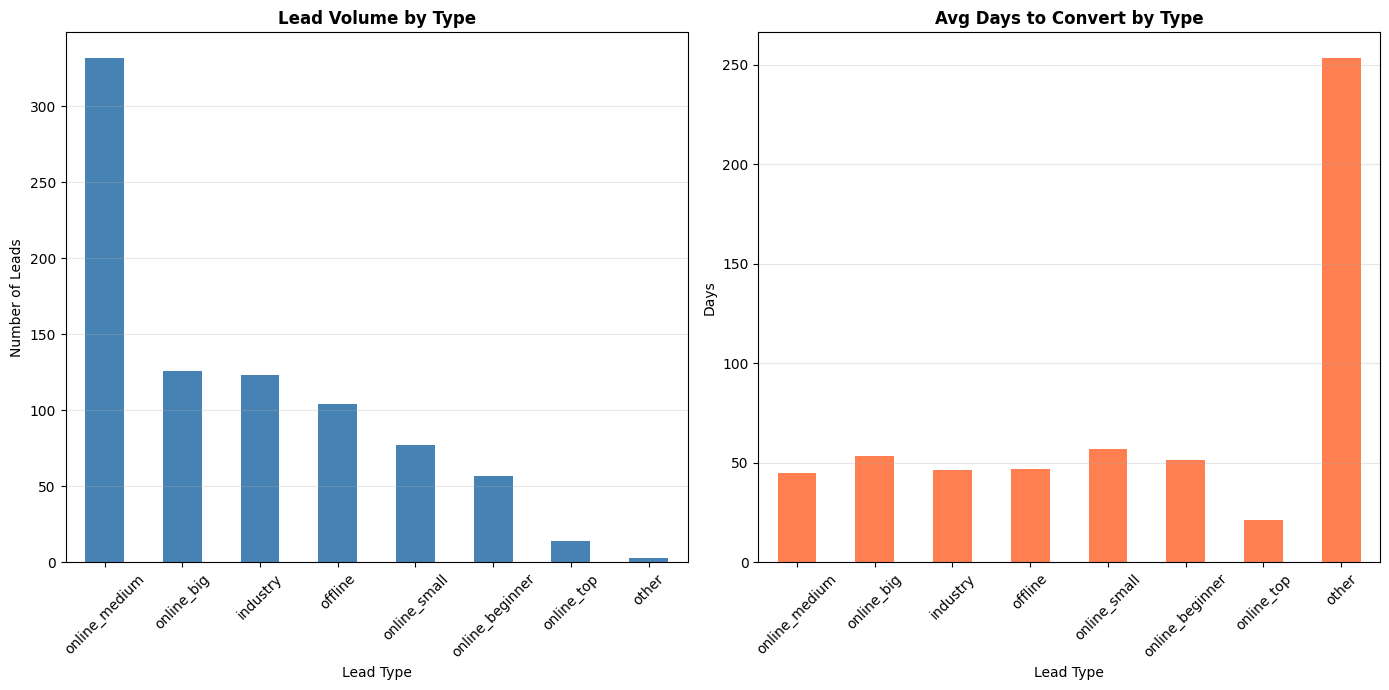

In [50]:
# Visualize lead type analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Volume by type
lead_type_analysis['total_leads'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Lead Volume by Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Lead Type')
axes[0].set_ylabel('Number of Leads')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Average days to convert by type
lead_type_analysis['avg_days_to_convert'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Avg Days to Convert by Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lead Type')
axes[1].set_ylabel('Days')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Business Segment Analysis

Analyzing conversion patterns across business segments.

In [13]:
# Analysis by business segment
segment_analysis = df_leads_deals.groupby('business_segment').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean'],
    'time_to_convert_days': 'mean'
}).round(2)

segment_analysis.columns = ['total_leads', 'conversions', 'conversion_rate', 'avg_days_to_convert']
segment_analysis['conversion_rate_pct'] = segment_analysis['conversion_rate'] * 100
segment_analysis = segment_analysis.sort_values('total_leads', ascending=False)

print("=== Analysis by Business Segment ===")
print(f"Top 15 segments by volume:")
display(segment_analysis.head(15))

=== Analysis by Business Segment ===
Top 15 segments by volume:


,total_leads,conversions,conversion_rate,avg_days_to_convert,conversion_rate_pct
business_segment,,,,,
home_decor,105,105,1.0,50.09,100.0
health_beauty,93,93,1.0,35.05,100.0
car_accessories,77,77,1.0,50.45,100.0
household_utilities,71,71,1.0,52.80,100.0
construction_tools_house_garden,69,69,1.0,60.71,100.0
audio_video_electronics,64,64,1.0,63.23,100.0
computers,34,34,1.0,55.00,100.0
pet,30,30,1.0,29.13,100.0
food_supplement,28,28,1.0,38.32,100.0


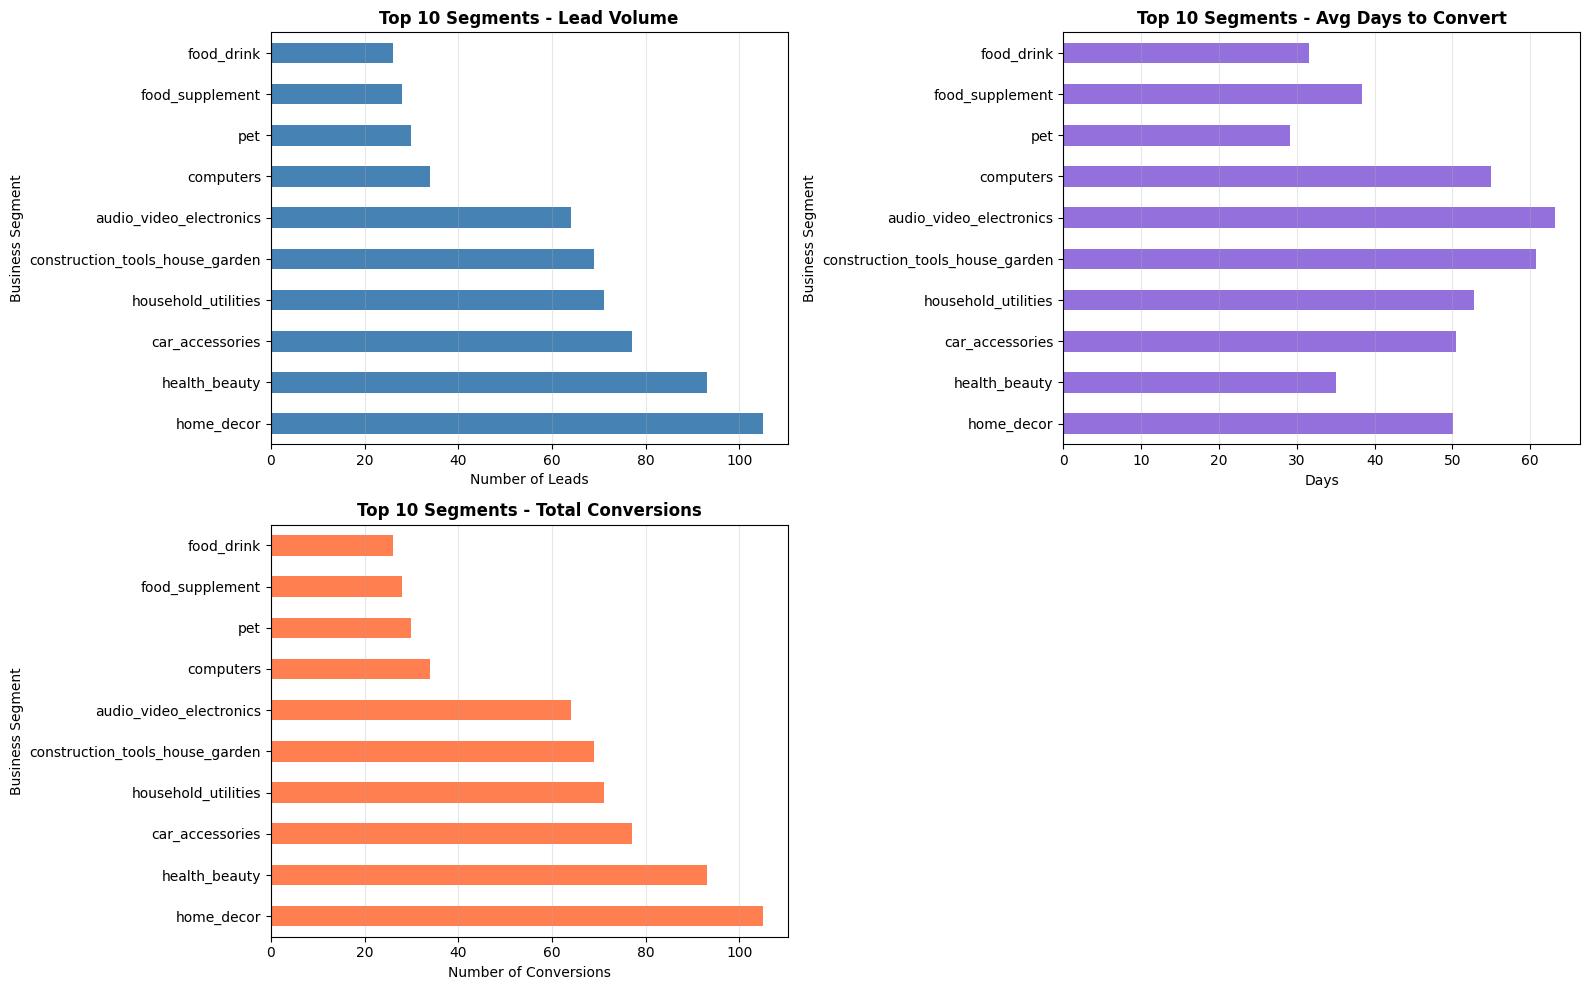

In [68]:
# Visualize top 10 segments
top_segments = segment_analysis.head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Volume by segment
top_segments['total_leads'].plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Top 10 Segments - Lead Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Leads')
axes[0, 0].set_ylabel('Business Segment')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Total conversions by segment
top_segments['conversions'].plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Top 10 Segments - Total Conversions', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Conversions')
axes[1, 0].set_ylabel('Business Segment')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 3: Avg days to convert by segment
top_segments['avg_days_to_convert'].plot(kind='barh', ax=axes[0, 1], color='mediumpurple')
axes[0, 1].set_title('Top 10 Segments - Avg Days to Convert', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('Business Segment')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 4: empty
axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Time to Conversion Analysis

Distribution and patterns of how long it takes leads to convert.

In [15]:
# Create time buckets for conversion analysis
df_leads_deals['conversion_period'] = pd.cut(
    df_leads_deals['time_to_convert_days'],
    bins=[-1, 7, 30, 60, 90, 180, 365, float('inf')],
    labels=['0-7 days', '8-30 days', '31-60 days', '61-90 days', '91-180 days', '181-365 days', '365+ days']
)

# Distribution of conversion times
conversion_time_dist = df_leads_deals[df_leads_deals['conversed_lead'] == True]['conversion_period'].value_counts().sort_index()

print("=== Distribution of Time to Conversion ===")
print(conversion_time_dist)
print(f"\nPercentage by period:")
print((conversion_time_dist / conversion_time_dist.sum() * 100).round(2))

=== Distribution of Time to Conversion ===
conversion_period
0-7 days        283
8-30 days       271
31-60 days       92
61-90 days       45
91-180 days      83
181-365 days     63
365+ days         4
Name: count, dtype: int64

Percentage by period:
conversion_period
0-7 days        33.65
8-30 days       32.22
31-60 days      10.94
61-90 days       5.35
91-180 days      9.87
181-365 days     7.49
365+ days        0.48
Name: count, dtype: float64


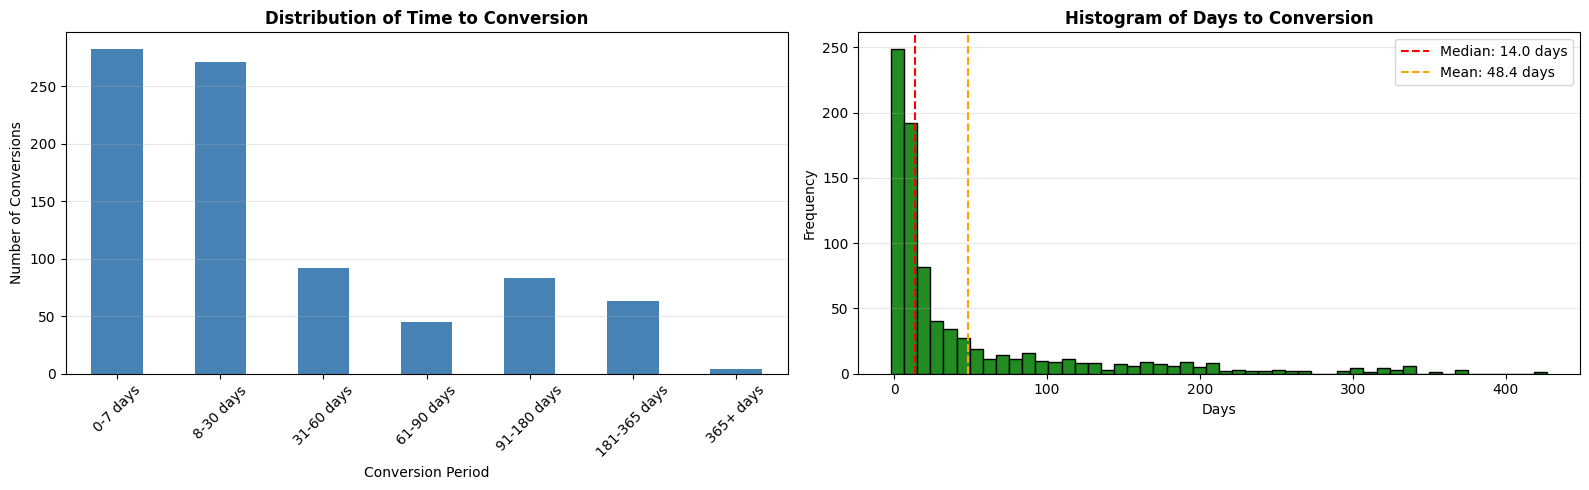

In [16]:
# Visualize conversion time distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Bar chart of conversion periods
conversion_time_dist.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Time to Conversion', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Conversion Period')
axes[0].set_ylabel('Number of Conversions')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Histogram of days to conversion
converted_leads = df_leads_deals[df_leads_deals['conversed_lead'] == True]
axes[1].hist(converted_leads['time_to_convert_days'], bins=50, color='forestgreen', edgecolor='black')
axes[1].set_title('Histogram of Days to Conversion', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=converted_leads['time_to_convert_days'].median(), 
                color='red', linestyle='--', label=f"Median: {converted_leads['time_to_convert_days'].median():.1f} days")
axes[1].axvline(x=converted_leads['time_to_convert_days'].mean(), 
                color='orange', linestyle='--', label=f"Mean: {converted_leads['time_to_convert_days'].mean():.1f} days")
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Seasonal and Temporal Patterns

Analyzing conversion patterns by day of week and month of year.

In [17]:
# Analysis by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_analysis = df_leads_deals.groupby('first_contact_weekday').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean']
}).round(2)

weekday_analysis.columns = ['total_leads', 'conversions', 'conversion_rate']
weekday_analysis['conversion_rate_pct'] = weekday_analysis['conversion_rate'] * 100
weekday_analysis = weekday_analysis.reindex(weekday_order)

print("=== Analysis by Day of Week ===")
display(weekday_analysis)

=== Analysis by Day of Week ===


,total_leads,conversions,conversion_rate,conversion_rate_pct
first_contact_weekday,,,,
Monday,1495,146,0.1,10.0
Tuesday,1452,164,0.11,11.0
Wednesday,1491,147,0.1,10.0
Thursday,1354,146,0.11,11.0
Friday,1150,140,0.12,12.0
Saturday,527,53,0.1,10.0
Sunday,531,46,0.09,9.0


In [18]:
# Analysis by month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_leads_deals['month_name'] = df_leads_deals['first_contact_month'].map(lambda x: month_names[x-1] if pd.notna(x) else None)

month_analysis = df_leads_deals.groupby('month_name').agg({
    'mql_id': 'count',
    'conversed_lead': ['sum', 'mean']
}).round(2)

month_analysis.columns = ['total_leads', 'conversions', 'conversion_rate']
month_analysis['conversion_rate_pct'] = month_analysis['conversion_rate'] * 100
month_analysis = month_analysis.reindex(month_names)

print("\n=== Analysis by Month of Year ===")
display(month_analysis)


=== Analysis by Month of Year ===


,total_leads,conversions,conversion_rate,conversion_rate_pct
month_name,,,,
Jan,1141,152,0.13,13.0
Feb,1028,149,0.14,14.0
Mar,1174,167,0.14,14.0
Apr,1352,183,0.14,14.0
May,1303,130,0.1,10.0
Jun,4,0,0.0,0.0
Jul,239,2,0.01,1.0
Aug,386,9,0.02,2.0
Sep,312,7,0.02,2.0


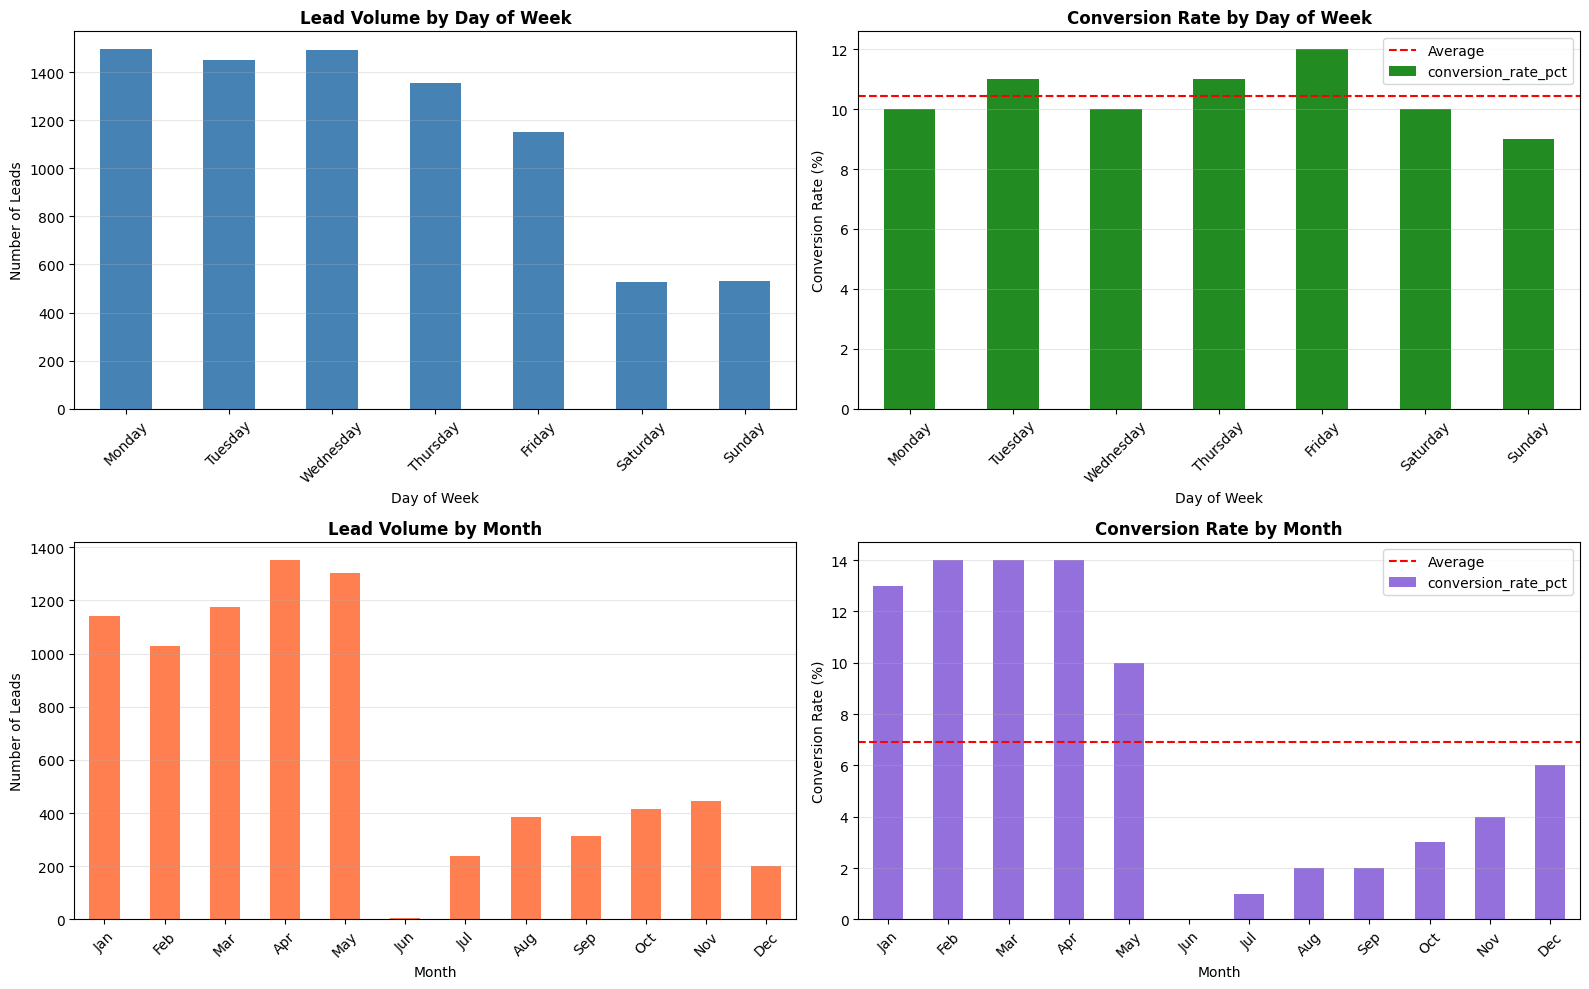

In [19]:
# Visualize seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Volume by weekday
weekday_analysis['total_leads'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Lead Volume by Day of Week', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Number of Leads')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Conversion rate by weekday
weekday_analysis['conversion_rate_pct'].plot(kind='bar', ax=axes[0, 1], color='forestgreen')
axes[0, 1].set_title('Conversion Rate by Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=weekday_analysis['conversion_rate_pct'].mean(), color='red', linestyle='--', label='Average')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Volume by month
month_analysis['total_leads'].plot(kind='bar', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Lead Volume by Month', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Leads')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Conversion rate by month
month_analysis['conversion_rate_pct'].plot(kind='bar', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Conversion Rate by Month', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Conversion Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=month_analysis['conversion_rate_pct'].mean(), color='red', linestyle='--', label='Average')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

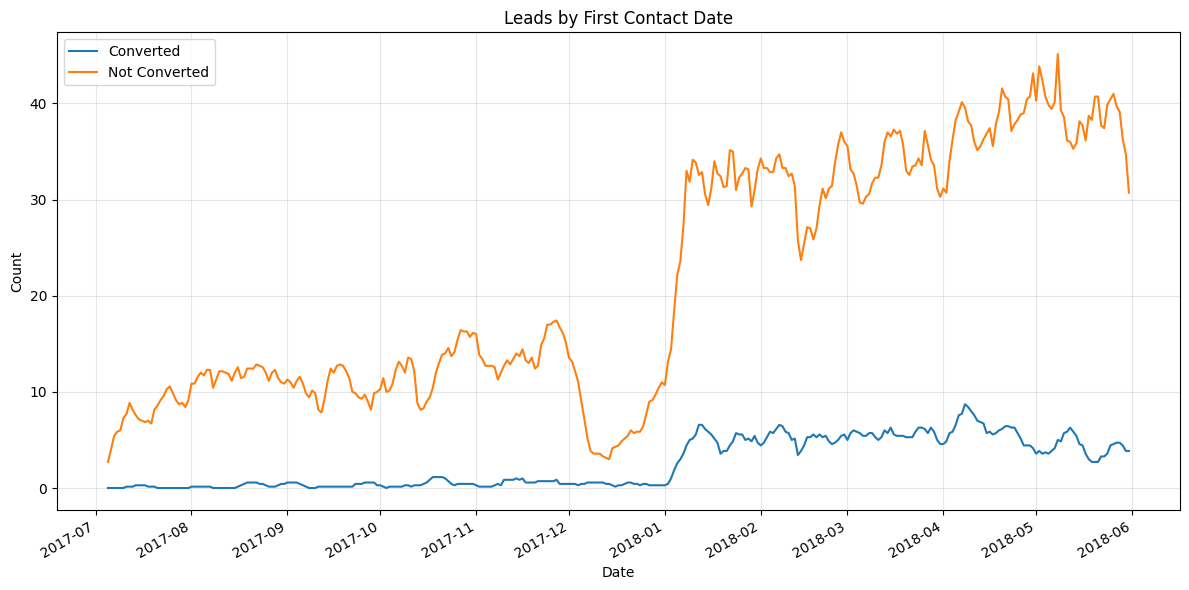

In [72]:
data = df_leads_deals.groupby("first_contact_date").agg(success_deal_count=("conversed_lead", "sum"),
                                                        failed_deal_count=("conversed_lead", lambda x: sum(~x)))

fig, ax = plt.subplots(figsize=(12, 6))
(data.rolling(7).mean()
     .rename(columns={'success_deal_count': 'Converted', 'failed_deal_count': 'Not Converted'})
     .plot(ax=ax))
ax.set_title('Leads by First Contact Date')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3)
plt.tight_layout()

## 8. Multi-dimensional Analysis: Origin × Landing Page

Cross-analysis to understand how different origins perform across lead types.

In [82]:
# Create pivot table: origin × landing page id
origin_page_pivot = pd.pivot_table(
    df_leads_deals,
    values='conversed_lead',
    index='origin',
    columns='landing_page_id',
    aggfunc='mean'
).fillna(0) * 100

print("=== Conversion Rate Matrix: Origin × Landing Page id (%) ===")
display(origin_page_pivot.round(2))

=== Conversion Rate Matrix: Origin × Landing Page id (%) ===


landing_page_id,007f9098284a86ee80ddeb25d53e0af8,01850876d34b43494b5f9879c366877b,0218f6be0b76aca72ab4d00ee9e8cf10,03c7c0ace395d80182db07ae2c30f034,04a75b75d5f4f3a16b0178fbe382da00,061c3918f72d289ee93d5d8a06c15c2e,0625ca637bf063abf254a66fe91fa84b,081b0e629b3899db213a23bc4e58a17d,08940bbad6e96fc4e620f2d9a00b1db4,090ffa1062e6dde353c36524563acefc,...,fb58285f6f6c4e504dfa628de116cae8,fbc24da54d531c6204ae2d17b1090bb1,fc4db0e1e8dfd5a305da563f9b2fc192,fc83c311415c9f67b6c7c87cf488b9c2,fd660f5d9a62d444c76191307b3a0514,fd7c4cdfbfb7964b441618d54f88c38b,fd7d977e75d1ac5cfe6b93ffabb150b1,fe82aeadeaea2186478fe6353d6d5301,ff3416719616ad4921acb8c74e21d6f0,ffc62d6945fd1423539ec6d96326c37c
origin,,,,,,,,,,,,,,,,,,,,,
direct_traffic,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
display,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
email,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
organic_search,6.25,0.0,10.0,0.0,0.0,0.0,50.0,0.0,0.0,33.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
other_publicities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
paid_search,6.82,0.0,15.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.81,0.0,0.0,0.0,0.0,0.0,28.57,0.0,0.0
referral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
social,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
origin_page_pivot

landing_page_id,007f9098284a86ee80ddeb25d53e0af8,01850876d34b43494b5f9879c366877b,0218f6be0b76aca72ab4d00ee9e8cf10,03c7c0ace395d80182db07ae2c30f034,04a75b75d5f4f3a16b0178fbe382da00,061c3918f72d289ee93d5d8a06c15c2e,0625ca637bf063abf254a66fe91fa84b,081b0e629b3899db213a23bc4e58a17d,08940bbad6e96fc4e620f2d9a00b1db4,090ffa1062e6dde353c36524563acefc,...,fb58285f6f6c4e504dfa628de116cae8,fbc24da54d531c6204ae2d17b1090bb1,fc4db0e1e8dfd5a305da563f9b2fc192,fc83c311415c9f67b6c7c87cf488b9c2,fd660f5d9a62d444c76191307b3a0514,fd7c4cdfbfb7964b441618d54f88c38b,fd7d977e75d1ac5cfe6b93ffabb150b1,fe82aeadeaea2186478fe6353d6d5301,ff3416719616ad4921acb8c74e21d6f0,ffc62d6945fd1423539ec6d96326c37c
origin,,,,,,,,,,,,,,,,,,,,,
direct_traffic,0.000000,0.0,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
display,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0
email,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
organic_search,6.250000,0.0,10.000000,0.0,0.0,0.0,50.0,0.0,0.0,33.333333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
other,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
other_publicities,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
paid_search,6.818182,0.0,15.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,23.809524,0.0,0.0,0.0,0.0,0.0,28.571429,0.0,0.0
referral,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
social,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## 9. Key Insights and Executive Summary

In [76]:
# Executive Summary
print("="*80)
print("COHORT ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

print(f"\n1. OVERALL PERFORMANCE")
print(f"   • Total Leads: {len(df_leads_deals):,}")
print(f"   • Total Conversions: {df_leads_deals['conversed_lead'].sum():,}")
print(f"   • Overall Conversion Rate: {df_leads_deals['conversed_lead'].mean()*100:.2f}%")
converted = df_leads_deals[df_leads_deals['conversed_lead'] == True]
print(f"   • Average Time to Convert: {converted['time_to_convert_days'].mean():.1f} days")
print(f"   • Median Time to Convert: {converted['time_to_convert_days'].median():.1f} days")

print(f"\n2. BEST PERFORMING COHORT")
best_cohort = cohort_summary['conversion_rate_pct'].idxmax()
print(f"   • Period: {best_cohort}")
print(f"   • Conversion Rate: {cohort_summary.loc[best_cohort, 'conversion_rate_pct']:.2f}%")
print(f"   • Total Leads: {cohort_summary.loc[best_cohort, 'total_leads']:.0f}")

print(f"\n3. BEST LEAD ORIGIN")
best_origin = origin_analysis['conversion_rate_pct'].idxmax()
print(f"   • Origin: {best_origin}")
print(f"   • Conversion Rate: {origin_analysis.loc[best_origin, 'conversion_rate_pct']:.2f}%")
print(f"   • Volume: {origin_analysis.loc[best_origin, 'total_leads']:.0f} leads")

print(f"\n4. HIGHEST VOLUME ORIGIN")
largest_origin = origin_analysis['total_leads'].idxmax()
print(f"   • Origin: {largest_origin}")
print(f"   • Volume: {origin_analysis.loc[largest_origin, 'total_leads']:.0f} leads")
print(f"   • Conversion Rate: {origin_analysis.loc[largest_origin, 'conversion_rate_pct']:.2f}%")

print(f"\n5. CONVERSION TIMELINE")
conversions_30 = (converted['time_to_convert_days'] <= 30).sum()
conversions_90 = (converted['time_to_convert_days'] <= 90).sum()
total_conv = len(converted)
print(f"   • Conversions within 30 days: {conversions_30/total_conv*100:.1f}%")
print(f"   • Conversions within 90 days: {conversions_90/total_conv*100:.1f}%")

print(f"\n6. SEASONALITY INSIGHTS")
best_weekday = weekday_analysis['conversion_rate_pct'].idxmax()
best_month = month_analysis['conversion_rate_pct'].idxmax()
print(f"   • Best Day of Week: {best_weekday} ({weekday_analysis.loc[best_weekday, 'conversion_rate_pct']:.2f}% conversion)")
print(f"   • Best Month: {best_month} ({month_analysis.loc[best_month, 'conversion_rate_pct']:.2f}% conversion)")

print("\n" + "="*80)

COHORT ANALYSIS - EXECUTIVE SUMMARY

1. OVERALL PERFORMANCE
   • Total Leads: 8,000
   • Total Conversions: 842
   • Overall Conversion Rate: 10.53%
   • Average Time to Convert: 48.4 days
   • Median Time to Convert: 14.0 days

2. BEST PERFORMING COHORT
   • Period: 2018-02
   • Conversion Rate: 14.00%
   • Total Leads: 1028

3. BEST LEAD ORIGIN
   • Origin: unknown
   • Conversion Rate: 16.00%
   • Volume: 1099 leads

4. HIGHEST VOLUME ORIGIN
   • Origin: organic_search
   • Volume: 2296 leads
   • Conversion Rate: 12.00%

5. CONVERSION TIMELINE
   • Conversions within 30 days: 65.9%
   • Conversions within 90 days: 82.2%

6. SEASONALITY INSIGHTS
   • Best Day of Week: Friday (12.00% conversion)
   • Best Month: Feb (14.00% conversion)



## 10. Strategic Recommendations

Based on the cohort analysis findings, here are key recommendations for improving lead conversion.

1. **CHANNEL OPTIMIZATION**
   - Focus investment on high-converting origins
   - Analyze why top-performing origins succeed and replicate strategies
   - Consider reducing spend on underperforming channels or optimize approach
   - A/B test different messaging/approaches for each origin

2. **LEAD MANAGEMENT & NURTURING**
   - Prioritize follow-up for leads from high-conversion segments
   - Create segment-specific nurturing campaigns
   - Develop fast-track processes for hot leads (0-30 day converters)

3. **COHORT MONITORING**
   - Track monthly cohort performance against benchmarks
   - Investigate significant deviations in cohort conversion rates
   - Use successful cohort strategies as templates for new cohorts
   - Set up alerts for underperforming cohorts

4. **SEASONAL OPTIMIZATION**
   - Increase marketing spend during high-conversion periods
   - Prepare sales team for seasonal peaks
   - Adjust messaging and offers based on seasonal patterns
   - Plan promotions around best-performing months

5. **CONVERSION VELOCITY**
   - Focus on reducing time to conversion
   - Create urgency through time-limited offers 
